In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(20.0,10.0)


In [2]:
from google.colab import files 
  
uploaded = files.upload()

Saving headbrain.csv to headbrain.csv


In [3]:
import io 
data = pd.read_csv(io.BytesIO(uploaded['headbrain.csv'])) 
print(data)


     Gender  Age Range  Head Size(cm^3)  Brain Weight(grams)
0         1          1             4512                 1530
1         1          1             3738                 1297
2         1          1             4261                 1335
3         1          1             3777                 1282
4         1          1             4177                 1590
..      ...        ...              ...                  ...
232       2          2             3214                 1110
233       2          2             3394                 1215
234       2          2             3233                 1104
235       2          2             3352                 1170
236       2          2             3391                 1120

[237 rows x 4 columns]


In [4]:
data.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [7]:
X=data['Head Size(cm^3)'].values
Y=data['Brain Weight(grams)'].values

In [8]:
mean_x=np.mean(X)
mean_y=np.mean(Y)

m=len(X)

numer=0
denom=0

for i in range(m):
  numer+=(X[i]-mean_x)*(Y[i]-mean_y)
  denom+=(X[i]-mean_x)**2

b1=numer/denom
b0=mean_y-(b1*mean_x)

print(b0,b1)

325.57342104944223 0.26342933948939945


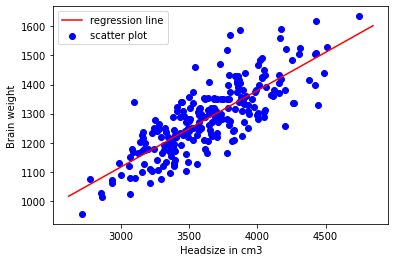

In [10]:
max_x=np.max(X)+100
min_x=np.min(X)-100

x=np.linspace(min_x,max_x,1000)
y=b0+b1*x

plt.plot(x,y,color='red',label='regression line')
plt.scatter(X,Y,color='blue',label='scatter plot')

plt.xlabel('Headsize in cm3')
plt.ylabel('Brain weight')
plt.legend()
plt.show()

In [11]:
ss_t=0
ss_r=0
for i in range(m):
  y_pred=b0+b1*X[i]
  ss_t+=(Y[i]-mean_y)**2
  ss_r+=(Y[i]-y_pred)**2

r2=1-(ss_r-ss_t)
print(r2)



2184983.187895096


In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X=X.reshape((m,1))

reg=LinearRegression()
reg=reg.fit(X,Y)

Y_pred=reg.predict(X)

r2_score=reg.score(X,Y)

print(r2_score)

0.639311719957
